## SVD: A Focus on Ovarian Cancer Data


- **Data Reduction**: SVD reduces the dimensionality of the data, making it easier to work with, especially in the context of large medical datasets.
- **Pattern Recognition**: It helps in uncovering patterns and relationships within the data that are not immediately apparent.
- **Better Understanding of Variance**: We gain insights into how much of the data's information is retained in the principal components.
- **Visualization for Interpretation**: The visual representation provides a clear picture of how cancerous and non-cancerous data points differ in terms of the principal components derived from SVD.

- **Cancer vs. Non-Cancer Visualization**: By differentiating points based on whether they represent cancerous or non-cancerous cases, we can visually assess how well these groups are separated in the reduced feature space. This separation is vital for understanding the characteristics of cancerous samples and potentially for developing diagnostic tools.

In conclusion, applying SVD to the ovarian cancer dataset enables us to distill and visualize the most informative aspects of the data. This is a crucial step in data-driven medical research, facilitating a deeper understanding of the disease characteristics and potentially guiding future diagnostic and treatment strategies.


In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

obs = np.genfromtxt('../../data/ovariancancer_obs.csv', delimiter=',')
grp = pd.read_csv('../../data/ovariancancer_grp.csv')
grp = grp.values[:,0]

print(obs.shape)

(216, 4000)


Note that obs dimentionality is 216, if we wanted to visualize non-cancer and cancer data points, selection of feature is difficult. Here we can use PCA and find first 2 or 3 Principal Components of the data to visualize.

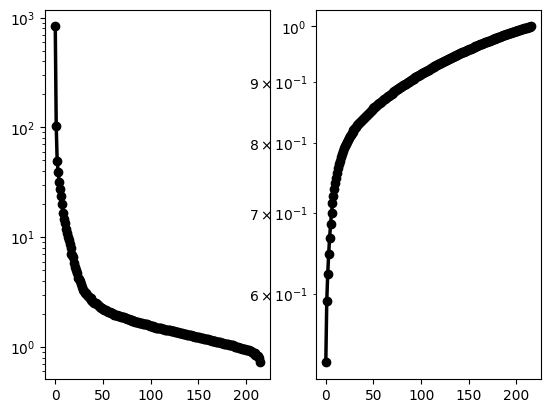

In [4]:

# Perform SVD
U, S, Vt = np.linalg.svd(obs, full_matrices=False)

# Plot singular values
plt.figure()
plt.subplot(1, 2, 1)
plt.semilogy(S, 'k-o', linewidth=2.5)
plt.subplot(1, 2, 2)
plt.semilogy(np.cumsum(S) / np.sum(S), 'k-o', linewidth=2.5)
plt.show()


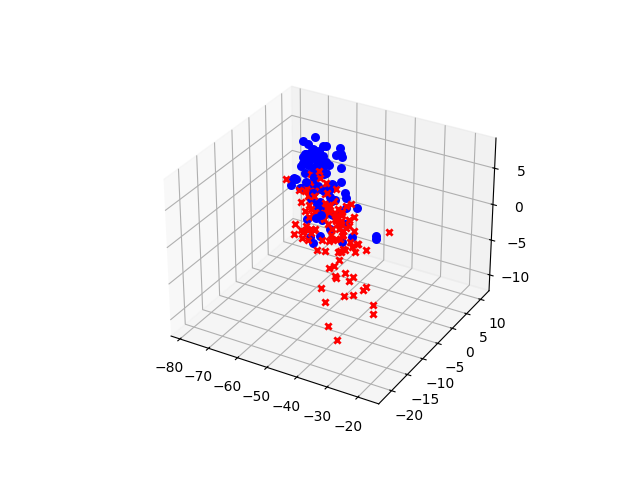

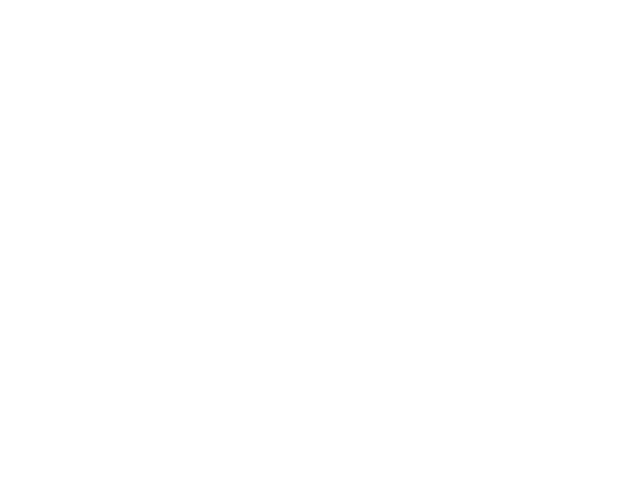

In [11]:

# Display of data
dim = 3
plt.figure()

if dim == 2:
    %matplotlib inline
    for i in range(grp.shape[0]):
        x = np.dot(Vt[0, :], obs[i, :])
        y = np.dot(Vt[1, :], obs[i, :])
        if grp[i] == 'Cancer':
            plt.plot(x, y, 'rx', linewidth=2)
        else:
            plt.plot(x, y, 'bo', linewidth=2)

elif dim == 3:
    %matplotlib widget
    from mpl_toolkits.mplot3d import Axes3D
    ax = plt.figure().add_subplot(111, projection='3d')
    for i in range(grp.shape[0]):
        x = np.dot(Vt[0, :], obs[i, :])
        y = np.dot(Vt[1, :], obs[i, :])
        z = np.dot(Vt[2, :], obs[i, :])
        if grp[i] == 'Cancer':
            ax.scatter(x, y, z, c='r', marker='x', linewidth=2)
        else:
            ax.scatter(x, y, z, c='b', marker='o', linewidth=2)
plt.show()

### Utilizing PCA for dimensionality reduction and reconstruct the original data from the reduced dimensions. 

This is a powerful technique in data science, especially in fields like medical research, where it can help in revealing hidden patterns in complex datasets and facilitating a clearer understanding of the data's structure and content.

### 1. Performing PCA

  
- **Fitting and Transforming the Data**: `fit_transform(obs)` performs the PCA on the dataset `obs`. This step computes the principal components (which are the directions of maximum variance in the data) and transforms `obs` onto the new subspace. The variable `score` holds the coordinates of `obs` in this new subspace.

- **Principal Axes**: `Vb = pca.components_` retrieves the principal axes in feature space, representing the directions of maximum variance in the data. These axes are the same as the right singular vectors in SVD.

### 2. Reconstructing the Original Data

```python
Brec = np.dot(Vb.T, score.T)
```

- **Reconstruction**: This line attempts to reconstruct the original data from the transformed data (`score`) using the principal components (`Vb`). In essence, it's an operation to map the data back to its original space but using the reduced number of components. This can be useful for understanding how much information is preserved in the reduced dimensionality space and for visualizing how PCA transformation affects the data.


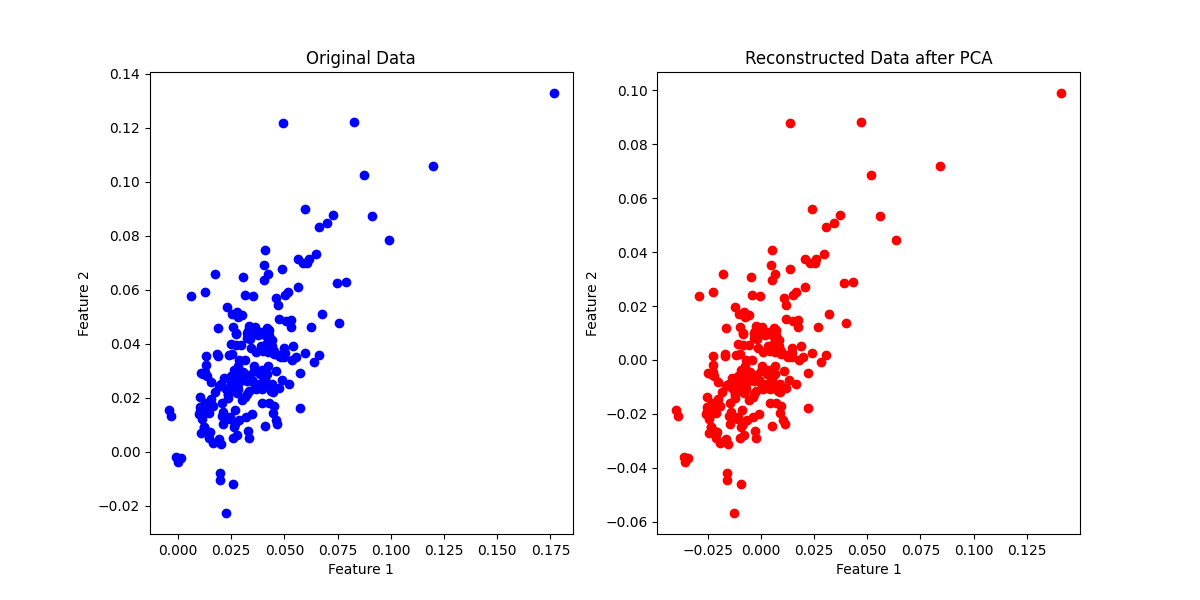

In [12]:

# PCA
pca = PCA()
score = pca.fit_transform(obs)
Vb = pca.components_

Brec = np.dot(Vb.T, score.T)

# You can add additional code to visualize or work with Brec as needed

import matplotlib.pyplot as plt

# Original Data
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.scatter(obs[:, 0], obs[:, 1], c='blue', label='Original Data')
plt.title("Original Data")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")

# Reconstructed Data
plt.subplot(1, 2, 2)
plt.scatter(Brec[0, :], Brec[1, :], c='red', label='Reconstructed Data')
plt.title("Reconstructed Data after PCA")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")

plt.show()


Reconstruction Error:  0.9625290401837123


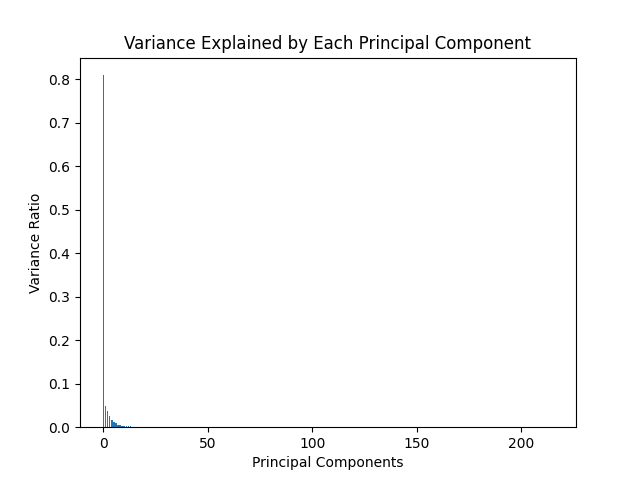

In [14]:
reconstruction_error = np.linalg.norm(obs - Brec.T, ord='fro') / np.linalg.norm(obs, ord='fro')
print("Reconstruction Error: ", reconstruction_error)

explained_variance = np.var(score, axis=0)
explained_variance_ratio = explained_variance / np.sum(explained_variance)

plt.figure()
plt.bar(range(len(explained_variance_ratio)), explained_variance_ratio)
plt.xlabel('Principal Components')
plt.ylabel('Variance Ratio')
plt.title('Variance Explained by Each Principal Component')
plt.show()


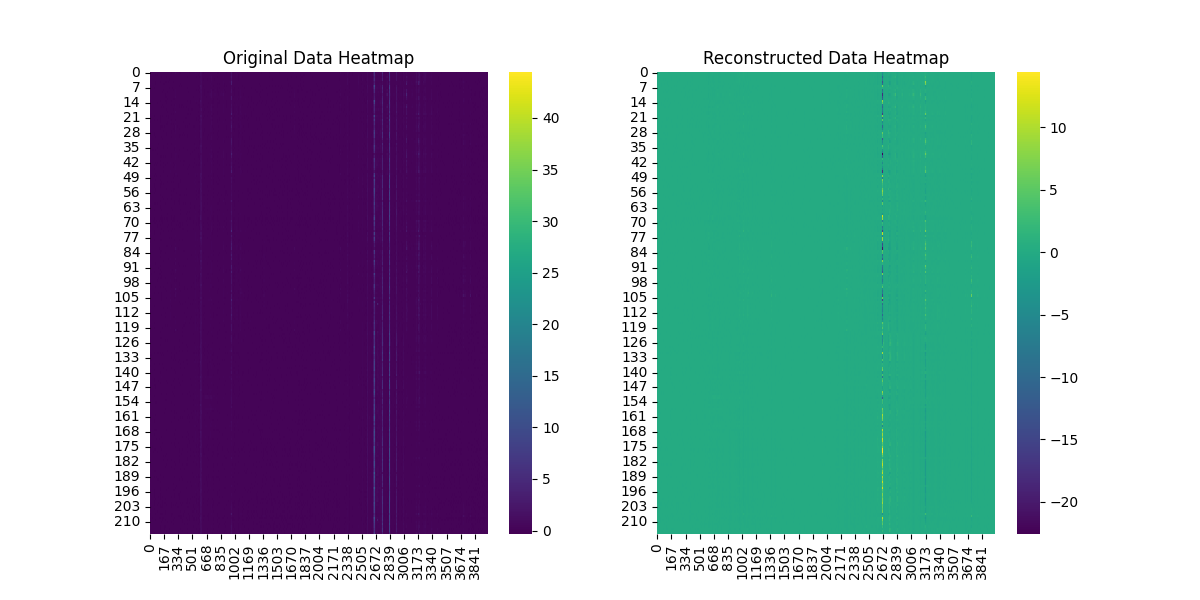

In [15]:
import seaborn as sns

# Heatmap for Original Data
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.heatmap(obs, cmap='viridis')
plt.title("Original Data Heatmap")

# Heatmap for Reconstructed Data
plt.subplot(1, 2, 2)
sns.heatmap(Brec.T, cmap='viridis')
plt.title("Reconstructed Data Heatmap")

plt.show()
